Yacub Bholat  
Data Analysis and Visualization Boot Camp  
API Homework - What's the Weather Like?  
Due: 6 January 2020  

# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "city_weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

today_date = date.today().strftime("%d/%m/%Y")

## Generate Cities List

In [2]:
cities = []
num_cities = 3000

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=num_cities)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=num_cities)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If city is unique, add to cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1027

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
def get_weather(cities, api_key):
    print("----------------------------------")
    print("Beginning Data Retrieval")
    print("----------------------------------")
    
    url = "http://api.openweathermap.org/data/2.5/weather"
    
    out_cities = []
    n = 1
    for city in cities:
        payload = {
            "appid": api_key,
            "q": city
        }

        r = requests.get(url, params=payload)

        if r.status_code == 200:
            print(f"City #{n}: Processing {city.capitalize()}...")
            out_cities.append(r.json())
        else:
            print(f"City #{n}: Not found. Skipping {city.capitalize()}...")
        n += 1
    
    print("----------------------------------")
    print("Data Retrieval Complete")
    print("----------------------------------")
    
    return out_cities

In [4]:
out_cities = get_weather(cities, api_key)

----------------------------------
Beginning Data Retrieval
----------------------------------
City #1: Processing Cidreira...
City #2: Processing Maraa...
City #3: Processing Port lincoln...
City #4: Processing Mar del plata...
City #5: Processing Georgetown...
City #6: Processing Alenquer...
City #7: Processing Miles city...
City #8: Processing Cape town...
City #9: Processing Khatanga...
City #10: Processing Husavik...
City #11: Processing Ashland...
City #12: Processing Atuona...
City #13: Processing Bakchar...
City #14: Processing Lebu...
City #15: Processing Yellowknife...
City #16: Processing Albany...
City #17: Processing Gela...
City #18: Processing Busselton...
City #19: Processing Hermanus...
City #20: Processing Mitsamiouli...
City #21: Processing Mehamn...
City #22: Processing Qaanaaq...
City #23: Processing Port alfred...
City #24: Processing Karpogory...
City #25: Processing Buraydah...
City #26: Processing Atbasar...
City #27: Processing Leningradskiy...
City #28: Proce

##### Print first entry to understand structure

In [5]:
out_cities[0]

{'coord': {'lon': -50.22, 'lat': -30.17},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'model',
 'main': {'temp': 297.24,
  'feels_like': 295.25,
  'temp_min': 297.24,
  'temp_max': 297.24,
  'pressure': 1008,
  'humidity': 84,
  'sea_level': 1008,
  'grnd_level': 1008},
 'wind': {'speed': 8.98, 'deg': 179},
 'rain': {'3h': 0.56},
 'clouds': {'all': 94},
 'dt': 1577936994,
 'sys': {'country': 'BR', 'sunrise': 1577953392, 'sunset': 1578003950},
 'timezone': -10800,
 'id': 3466165,
 'name': 'Cidreira',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data = [{
    "City": city["name"],
    "Cloudiness (%)": city["clouds"]["all"],
    "Country": city["sys"]["country"],
    "Date (Unix UTC)": city["dt"],
    "Humidity (%)": city["main"]["humidity"],
    "Lat": city["coord"]["lat"],
    "Lng": city["coord"]["lon"],
    "Max Temp (F)": (city["main"]["temp_max"] - 273.15) * (9/5) + 32, # convert from kelvin
    "Wind Speed (mph)": city["wind"]["speed"] * 2.237 # convert from meters per second
} for city in out_cities]

city_data = pd.DataFrame(city_data)
city_data.to_csv(output_data_file)
city_data.count()

City                919
Cloudiness (%)      919
Country             919
Date (Unix UTC)     919
Humidity (%)        919
Lat                 919
Lng                 919
Max Temp (F)        919
Wind Speed (mph)    919
dtype: int64

In [7]:
city_data.head()

,City,Cloudiness (%),Country,Date (Unix UTC),Humidity (%),Lat,Lng,Max Temp (F),Wind Speed (mph)
0,Cidreira,94,BR,1577936994,84,-30.17,-50.22,75.362,20.08826
1,Maraa,68,BR,1577937114,88,-1.83,-65.37,73.652,2.23700
2,Port Lincoln,96,AU,1577937047,51,-34.72,135.86,73.868,9.93228
3,Mar del Plata,0,AR,1577937115,78,-46.43,-67.52,61.880,4.69770
4,Georgetown,40,GY,1577936883,94,6.80,-58.16,71.600,4.69770


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Longitude Plot

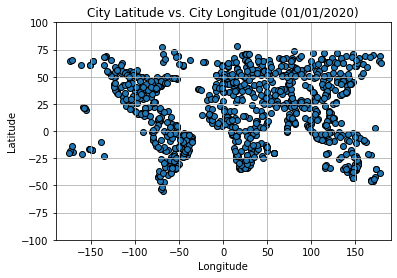

In [8]:
plt.title(f"City Latitude vs. City Longitude ({today_date})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(-190, 190)
plt.ylim(-100, 100)
plt.grid(axis="both")
plt.scatter(city_data["Lng"],
            city_data["Lat"],
            marker='o',
            edgecolors="black"
           )
plt.savefig("01 City Latitude vs. City Longitude.png")
plt.show()

#### Latitude vs. Temperature Plot

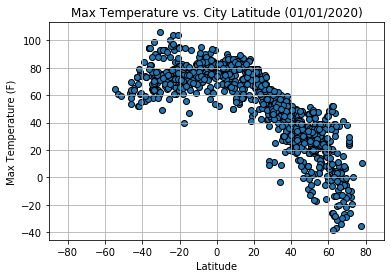

In [9]:
plt.title(f"Max Temperature vs. City Latitude ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-90, 90)
plt.grid(axis="both")
plt.scatter(city_data["Lat"],
            city_data["Max Temp (F)"],
            marker='o',
            edgecolors="black"
           )
plt.savefig("02 Max Temperature vs. City Latitude.png")
plt.show()

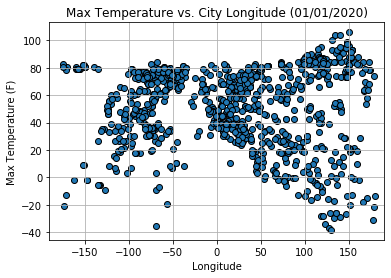

In [10]:
plt.title(f"Max Temperature vs. City Longitude ({today_date})")
plt.xlabel("Longitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-190, 190)
plt.grid(axis="both")
plt.scatter(city_data["Lng"],
            city_data["Max Temp (F)"],
            marker='o',
            edgecolors="black"
           )
plt.savefig("02 Max Temperature vs. City Longitude.png")
plt.show()

#### Latitude vs. Humidity Plot

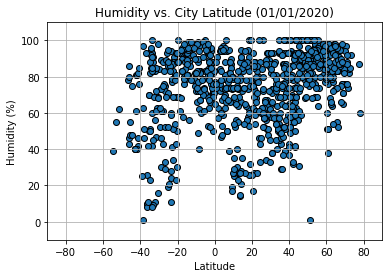

In [11]:
plt.title(f"Humidity vs. City Latitude ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.ylim(-10, 110)
plt.grid(axis="both")
plt.scatter(city_data["Lat"],
            city_data["Humidity (%)"],
            marker='o',
            edgecolors="black"
           )
plt.savefig("03 Humidity vs. City Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

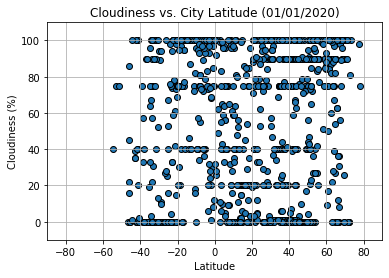

In [12]:
plt.title(f"Cloudiness vs. City Latitude ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90, 90)
plt.ylim(-10, 110)
plt.grid(axis="both")
plt.scatter(city_data["Lat"],
            city_data["Cloudiness (%)"],
            marker='o',
            edgecolors="black"
           )
plt.savefig("04 Cloudiness vs. City Latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

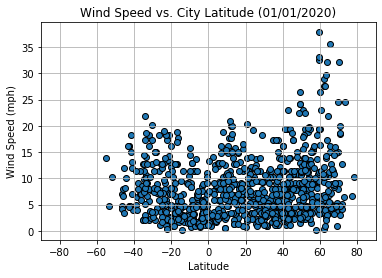

In [13]:
plt.title(f"Wind Speed vs. City Latitude ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-90, 90)
plt.grid(axis="both")
plt.scatter(city_data["Lat"],
            city_data["Wind Speed (mph)"],
            marker='o',
            edgecolors="black"
           )
plt.savefig("05 Wind Speed vs. City Latitude.png")
plt.show()